In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from mnist import MNIST
from tqdm import tqdm

Error: 0.00


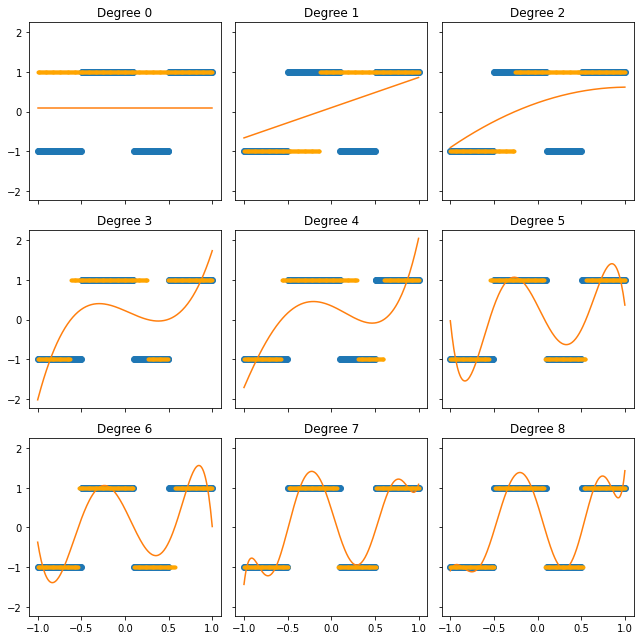

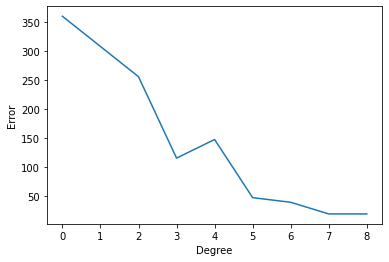

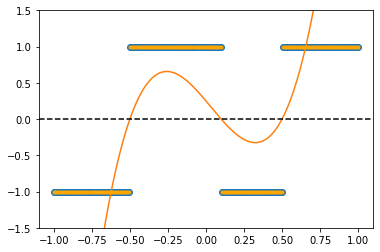

In [95]:
# 14.6  Polynomial Classifier with one feature.
import numpy.polynomial.polynomial as poly

N = 200
x = np.linspace(-1, 1, N)
y = np.where(np.logical_or(np.logical_and(x >= -.5, x < .1), x >= .5), 1, -1)

pfs = []
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, tight_layout=True, figsize=(9,9))
for i in range(9):
    coefs = poly.polyfit(x, y, i)
    ffit = poly.polyval(x, coefs)
    fhat = np.sign(ffit)
    pfs.append(ffit)
    axs[i//3, i%3].plot(x, y, "o", label="y")
    axs[i//3, i%3].plot(x, ffit)
    axs[i//3, i%3].plot(x, fhat, ".", color="orange")
    axs[i//3, i%3].set_title(f"Degree {i}")

pfs = np.array(pfs)
errors = np.square(np.sign(pfs) - y).sum(axis=1)
fig, ax = plt.subplots()
ax.plot(errors)
ax.set_ylabel("Error")
ax.set_xlabel("Degree")

c = 10
ftilde = c * (x + 0.5) * (x - 0.1) * (x - 0.5)
fhat = np.sign(ftilde)
fig, ax = plt.subplots()
ax.plot(x, y, "o")
ax.plot(x, ftilde)
ax.plot(x, fhat, ".", color="orange")
ax.axhline(0, color="k", ls="--")
ax.set_ylim(-1.5, 1.5)
error = np.square(fhat - y).sum()
print(f"Error: {error:.2f}")

[-0.10492655 -0.05237245  0.00653885 -0.03579568  0.72334758  0.06689535]
[0.68237113]


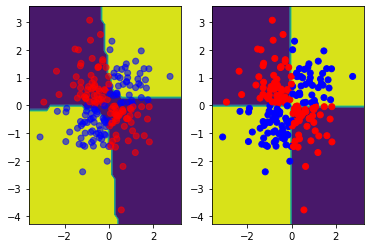

In [90]:
# 14.7 Polynomial classifier with two features.
rng = np.random.default_rng(0)

x = rng.normal(size=(N, 2))
y = np.where(x.prod(axis=1) >= 0, 1, -1)
cm = np.where(y > 0, "blue", "red")

A = np.array([np.ones(N), x[:,0], x[:,1], x[:,0]**2, x.prod(axis=1), x[:,1]**2]).T
coef, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

fig, axs = plt.subplots(1, 2, figsize=(6, 4))
axs[0].scatter(x[:,0], x[:,1], marker="o", color=cm, alpha=0.6)
mins = x.min(axis=0) - .5
maxs = x.max(axis=0) + .5
x1 = np.linspace(mins[0], maxs[0])
x2 = np.linspace(mins[1], maxs[1])
X1, X2 = np.meshgrid(x1, x2)
X1 = X1.flatten()
X2 = X2.flatten()
M = X1.shape[0]
A1 = np.array([np.ones(M), X1, X2, X1**2, X1*X2, X2**2]).T
ytilde = A1 @ coef
yhat = np.where(ytilde > 0, 1, -1)
axs[0].contourf(X1.reshape(50, 50), X2.reshape(50, 50), yhat.reshape(50, 50), zorder=-1)
# X1.reshape(50, 50), X2.reshape(50, 50), 
print(coef)

A2 = x.prod(axis=1)
coefs1, _, _, _ = np.linalg.lstsq(A2[:, np.newaxis], y, rcond=0)
ytilde = X1 * X2 * coefs1
axs[1].scatter(x[:,0], x[:,1], marker="o", color=cm)
yhat = np.where(ytilde > 0, 1, -1)
axs[1].contourf(X1.reshape(50, 50), X2.reshape(50, 50), yhat.reshape(50, 50), zorder=-1)
print(coefs1)

In [113]:
iris = datasets.load_iris()

In [119]:
# import some data to play with
X = iris.data
N = X.shape[0]
y = iris.target

enc = OneHotEncoder(sparse=False)
y_K = enc.fit_transform(y.reshape(-1, 1))
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X, y_K)
y_tilde = lm.predict(X)
y_hat = y_tilde.argmax(axis=1)
confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0,  7, 43]])

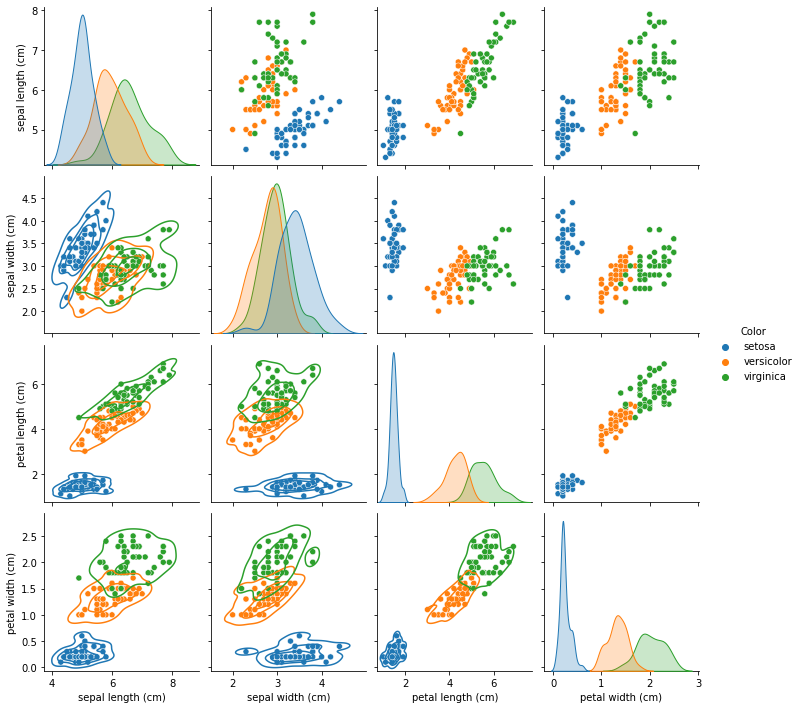

In [131]:
flowers = pd.DataFrame(X, columns=iris.feature_names)
# flowers["Color"] = pd.Series(y).replace({0:"b", 1:"g", 2:"r"})
flowers["Color"] = pd.Series(y).replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})

g = sns.pairplot(flowers, hue="Color")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [4]:
X = np.concatenate([np.ones((N,1)), X], axis=1)
beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
yhat = np.sign(X@beta)

confusion_matrix(y, yhat)

array([[93,  7],
       [ 4, 46]])

In [5]:
mndata = MNIST("data/mnist")
mndata.gz = True
train_X, train_y = mndata.load_training()
test_X, test_y = mndata.load_testing()

In [6]:
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)

In [7]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [8]:
labels, counts = np.unique(train_y, return_counts=True)
np.array([labels, counts]).T

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

Text(0.5, 1.0, 'Location of pixels used as features\nin handwritten digit classification')

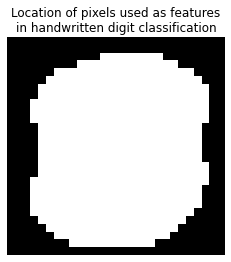

In [9]:
train_X_proc = train_X.reshape(train_X.shape[0], -1)
train_X_proc = minmax_scale(train_X_proc)
nonzero = (train_X_proc > 0).sum(axis=0) >= 600
train_X_proc = train_X_proc[:,nonzero]
plt.imshow(nonzero.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.title("Location of pixels used as features\nin handwritten digit classification");

In [10]:
y = np.where(train_y == 0, 1, -1)
beta, _, _, _ = np.linalg.lstsq(train_X_proc, y, rcond=None)
ytilde_1 = train_X_proc@beta
yhat_1 = np.sign(ytilde_1)

confusion_matrix(y, yhat_1)

array([[53749,   328],
       [  583,  5340]])

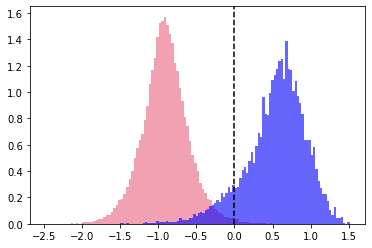

In [11]:
plt.hist(ytilde_1[y == -1], bins=100, density=True, alpha=0.4, color="crimson")
plt.hist(ytilde_1[y == 1], bins=100, density=True, alpha=0.6, color="blue")
plt.axvline(0, color="k", ls="--");

Text(0.5, 1.0, 'Least-Square Coefficients\nDistinguish zero from other digits')

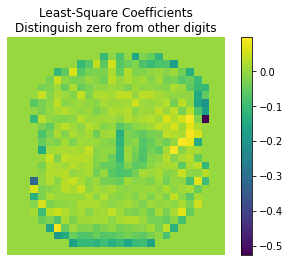

In [12]:
coef = np.zeros(nonzero.shape)
coef[nonzero] = beta
# coef = np.clip(coef, -.1, .1)
plt.imshow(coef.reshape(28, 28))
plt.axis('off')
plt.colorbar()
plt.title("Least-Square Coefficients\nDistinguish zero from other digits")

In [13]:
rng = np.random.default_rng(seed=0)
R = rng.choice([-1, 1], size=(5000, train_X_proc.shape[1]))

In [14]:
N = train_X_proc.shape[0]
Rt = np.zeros((N, 5000))
step = 500
for j in tqdm(np.arange(0, N, step)):
    Rt[j:j+step] = train_X_proc[j:j+step] @ R.T
    Rt[j:j+step] = np.maximum(Rt[j:j+step], 0)

100%|██████████| 120/120 [00:24<00:00,  4.95it/s]


In [1]:
features = np.hstack((train_X_proc, Rt))

NameError: name 'np' is not defined

In [16]:
beta, _, _, _ = np.linalg.lstsq(features, y, rcond=None)
ytilde = features@beta
yhat = np.sign(ytilde)

confusion_matrix(y, yhat)

array([[54060,    17],
       [  118,  5805]])

In [ ]:
counts_other, bins_other = np.histogram(ytilde[y == -1], bins=100)
counts_other = counts_other / (y==-1).sum()
counts_zero, bins_zero = np.histogram(ytilde[y == 1], bins=100)
counts_zero = counts_zero / (y==-1).sum()

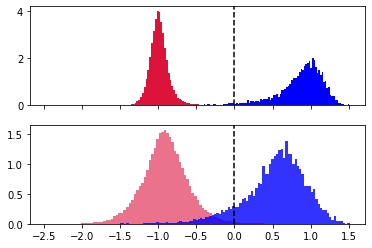

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(ytilde[y == -1],    bins=100, density=True, color="crimson")
axs[0].hist(ytilde[y == 1],     bins=100, density=True, color="blue")
axs[0].axvline(0, color="k", ls="--");
axs[1].hist(ytilde_1[y == -1],  bins=100, density=True, alpha=0.6, color="crimson")
axs[1].hist(ytilde_1[y == 1],   bins=100, density=True, alpha=0.8, color="blue")
axs[1].axvline(0, color="k", ls="--");